# This is a program to slice mouse brain RNAseq results.

CSV file is "original_cd320.KOB12neg_vs_ctrlB12neg"

path is dbernard/Documents/DJB files/Brody Lab/mouse CD320/Brain RNA seq experiment/Brain RNAseq analysis by McGaughey/

## Presented by
#### David Bernard, NHGRI


## Background:  

Humans with prolonged vitamin B12 deficiency present with anemia but also have neuropathological disturbances such as:  
 * poor memory  
 * depression
 * cognitive decline
 * peripheral neuropathy that leads to numbness in the hands and/or feet


### Previously
I created a gene-knockout mouse where I disrupted the mouse  _Cd320_ gene that transports vitamin B12 from circulation into the cell.  I modelled gene-environment interactions by feeding the mice diets either replete or deficienct for vitamin B12.

### The _Cd320_ knockout mice fed a vitamin B12-deficient diet develop the following phenotypes:
* metabolic abnormalities
* reproductive deficiency
* hematological insufficiency
 * develop anemia after almost a year of vitamin B12-deficient diet 

### However, 
These mice don't present with any obvious neurological phenotype.

I wondered if there was some type of change in gene expression in the mouse brain that may be compensating and masking an overt phenotype.  

Alternatively, I wondered if there was a subtle neurological phenotype that could be identified by examining the patterns of gene expression in the brain in my knockout mice compared to controls.

## Hypothesis:  
#### There are RNA expression differences between my control mice and knockout mice.

## Null Hypothesis:
#### There are no differences in RNA expression in the brain between control mice and knockout mice.

### Procedures:
To examine gene expression in brains of my mice
* Isolated brain RNA  from control and _Cd320_  knockout mice.  
* Performed RNA-seq on the whole-brain RNA. 
* Cleaned low quality sequencing reads
* Mapped reads back to the mouse genome 
* Counted and normalized reads 
 * The "counts" represent each time an RNA molecule for each gene was sequenced. 
  * Higher expressing genes will have more RNA molecules and therfore be sequenced more often than lower expressing genes with fewer RNA molecules present.

### Data
The output of the RNAseq experiment is a large .csv file with a row for every gene in the genome and columns for gene, control or KO mouse ID, and statistical data such as log2FoldChange, pvalue and padj.

### Goal: 
**I want to select the columns for gene, log2FoldChange and padj and write this data to a tab separated file that can be uploaded to commercial sites for gene pathway analysis.  I also want to sort and select the top 500 to 1000 genes that have increased or decreased expression for Principle Component Analysis (PCA).**

In [20]:
#import pandas and import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Define the url where the data can be found 
url = "https://fusion.nhgri.nih.gov/files/bernard/original_cd320.koB12neg_vs_ctrlB12neg_copy.csv"


In [22]:
# Open the csv data file and read into variable df as a pandas dataframe
df = pd.read_csv(url)

#Alternatively, if the data is local
#df = pd.read_csv("original_cd320.koB12neg_vs_ctrlB12neg_copy.csv")


In [23]:
# print the head of df to see that file opened properly
df.head()


,Gene,Source,Chr,Start,End,baseMean,log2FoldChange,log2FoldChangeUncorrected,lfcSE,stat,...,Control.Normal.B12_10,Control.Normal.B12_15,KO.B12_Deficient.B12_03,KO.B12_Deficient.B12_04,KO.B12_Deficient.B12_06,KO.B12_Deficient.B12_07,KO.Normal.B12_01,KO.Normal.B12_08,KO.Normal.B12_11,KO.Normal.B12_12
0,Tmem181a,HAVANA,chr17,6270470,6308314,14902.552866,-0.686035,-0.712041,0.017077,-40.172218,...,18346.249782,18475.883409,11224.547655,11321.244681,11175.307230,11333.126407,11434.949103,11357.689735,11390.642607,11424.623768
1,Cd320,HAVANA,chr17,33843091,33849774,176.246376,-1.195882,-6.074842,0.043120,-27.733483,...,300.828145,367.548311,1.964394,9.866868,2.164499,6.732741,4.370490,4.140986,7.076582,2.035386
2,Gm16867,HAVANA,chr14,69363504,69503362,1749.882377,-0.696872,-0.870387,0.036290,-19.202594,...,2202.872764,2258.910973,1294.535685,1178.104074,1206.708073,1251.327969,1364.466867,1271.282745,1241.055493,1282.293421
3,Entpd4,HAVANA,chr14,69337174,69367270,5582.269809,-0.492651,-0.551765,0.028132,-17.512058,...,6801.703024,6552.499203,4684.097634,4298.007829,4510.815469,4420.525245,4662.438352,4484.687990,4729.810206,4548.070873
4,Pyroxd2,ENSEMBL,chr19,42725858,42752775,210.092764,0.622038,1.512406,0.045080,13.798491,...,97.075749,102.367567,296.623503,301.926170,314.934573,304.896976,334.779507,303.327235,353.829078,309.378730


In [24]:
# out of curiosity, check that there are about 20,000 lines in the df by passing the tail() method
df.tail()

,Gene,Source,Chr,Start,End,baseMean,log2FoldChange,log2FoldChangeUncorrected,lfcSE,stat,...,Control.Normal.B12_10,Control.Normal.B12_15,KO.B12_Deficient.B12_03,KO.B12_Deficient.B12_04,KO.B12_Deficient.B12_06,KO.B12_Deficient.B12_07,KO.Normal.B12_01,KO.Normal.B12_08,KO.Normal.B12_11,KO.Normal.B12_12
19987,Vmn2r73,HAVANA,chr7,85857547,85875938,0.061520,0.0,0.0,0.001917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
19988,Wfdc21,HAVANA,chr11,83746940,83752642,0.109917,0.0,0.0,0.001917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.874098,0.000000,0.884573,0.0
19989,Zdhhc25,HAVANA,chr15,88600302,88601669,0.054631,0.0,0.0,0.001917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.874098,0.000000,0.000000,0.0
19990,Zfp352,HAVANA,chr4,90218820,90225702,0.064703,0.0,0.0,0.001917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.035247,0.000000,0.0
19991,Zfp616,HAVANA,chr11,74069955,74087292,0.061520,0.0,0.0,0.001917,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [25]:
# Examine the column information of the current df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 29 columns):
Gene                            19992 non-null object
Source                          19992 non-null object
Chr                             19992 non-null object
Start                           19992 non-null int64
End                             19992 non-null int64
baseMean                        19992 non-null float64
log2FoldChange                  19992 non-null float64
log2FoldChangeUncorrected       19992 non-null float64
lfcSE                           19992 non-null float64
stat                            19992 non-null float64
pvalue                          19992 non-null float64
weight                          19992 non-null float64
padj                            19992 non-null float64
Control.B12_Deficient.B12_09    19992 non-null float64
Control.B12_Deficient.B12_13    19992 non-null float64
Control.B12_Deficient.B12_14    19992 non-null float64
Control.B12_Defici

In [26]:
#Explore the shape of current df: number of rows and columns
df.shape

(19992, 29)

In [27]:
#slice file to get only the columns for Gene, log2FoldChange and padj in newdf

newdf = df.loc[:,['Gene','log2FoldChange','padj']]

# print the head of the newdf to see if the slicing worked properly
newdf.head()


,Gene,log2FoldChange,padj
0,Tmem181a,-0.686035,2.966812e-13
1,Cd320,-1.195882,2.966812e-13
2,Gm16867,-0.696872,2.966812e-13
3,Entpd4,-0.492651,2.966812e-13
4,Pyroxd2,0.622038,2.966812e-13


In [28]:
# take the log10 of padj column and append it to the newdf, then print the head
newdf['-log10padj'] = np.log10(1/df['padj'])
newdf.head()

,Gene,log2FoldChange,padj,-log10padj
0,Tmem181a,-0.686035,2.966812e-13,12.52771
1,Cd320,-1.195882,2.966812e-13,12.52771
2,Gm16867,-0.696872,2.966812e-13,12.52771
3,Entpd4,-0.492651,2.966812e-13,12.52771
4,Pyroxd2,0.622038,2.966812e-13,12.52771


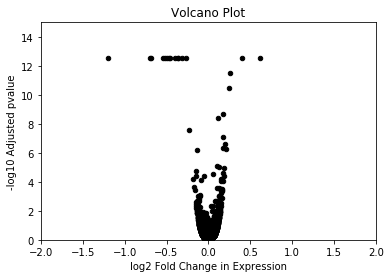

In [29]:
# Add a graphical view of the data here - plot padj value or log2FoldChange 

newdf.plot(kind='scatter',
           x='log2FoldChange', 
           y='-log10padj', color = 'k')
plt.title("Volcano Plot")
plt.xlabel('log2 Fold Change in Expression')
plt.ylabel('-log10 Adjusted pvalue')
plt.axis([-2,2, 0, 15])
plt.show()


In [30]:
# initialize an empty dataframe for only the significant genes called sig_df


sig_df = []

# slice the padj column of the newdf to get only genes with a padj<0.5 and pass it to sig_df
sig_df=newdf[newdf['padj'] <0.05]

#examine the sig_df dataframe for number of rows and the top or bottom 10 significant genes
print(sig_df.shape)
print(sig_df.head(10)) 
print(sig_df.tail(10))



(222, 4)
       Gene  log2FoldChange          padj  -log10padj
0  Tmem181a       -0.686035  2.966812e-13    12.52771
1     Cd320       -1.195882  2.966812e-13    12.52771
2   Gm16867       -0.696872  2.966812e-13    12.52771
3    Entpd4       -0.492651  2.966812e-13    12.52771
4   Pyroxd2        0.622038  2.966812e-13    12.52771
5   Golga7b        0.398772  2.966812e-13    12.52771
6      Efhb       -0.470159  2.966812e-13    12.52771
7      Pisd       -0.516997  2.966812e-13    12.52771
8     Pdzd7       -0.538749  2.966812e-13    12.52771
9    Gm6882       -0.456024  2.966812e-13    12.52771
        Gene  log2FoldChange      padj  -log10padj
212     Alpl        0.113103  0.047198    1.326075
213    Prr5l        0.119527  0.047198    1.326075
214  Gm20594        0.112248  0.047219    1.325883
215    Cspg4        0.112144  0.047337    1.324797
216      Psd       -0.081856  0.047337    1.324797
217    Brcc3       -0.103740  0.048060    1.318214
218    Uqcc1       -0.089108  0.048060  

In [31]:
sig_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 4 columns):
Gene              222 non-null object
log2FoldChange    222 non-null float64
padj              222 non-null float64
-log10padj        222 non-null float64
dtypes: float64(3), object(1)
memory usage: 8.7+ KB


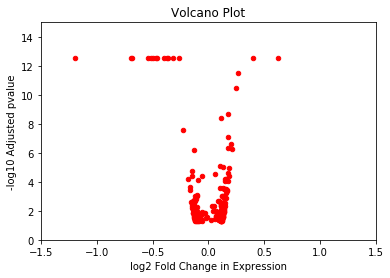

In [14]:
sig_df.plot(kind='scatter',
           x='log2FoldChange', 
           y='-log10padj', color = 'r')
plt.title("Volcano Plot")
plt.xlabel('log2 Fold Change in Expression')
plt.ylabel('-log10 Adjusted pvalue')
plt.axis([-1.5,1.5, 0, 15])
#labels = sig_df['Gene']

#for i in enumerate(sig_df['Gene']):
                        #plt.annotate(txt, (sig_df['log2FoldChange'], sig_df['-log10padj']))

plt.show()

In [32]:
#remove "-log10padj" column from newdf to prepare file for saving only the "Gene", "log2FoldChange" and "padj" columns
newdf.drop('-log10padj', inplace=True)
newdf.head()

KeyError: "['-log10padj'] not found in axis"

In [26]:
#save sliced dataframe as tab seperated  .txt file 

newdf.to_csv(r'/Users/dbernard/newdf.txt', sep = '\t', index = False)
sig_df.to_csv(r'/Users/dbernard/sig_df.txt', sep = '\t', index = False)



This newdf file can now be uploaded for use in 

### Partek Genomics Suite 

or 

### Ingenuity Pathway Analysis 

or other pathway analysis tools

In [ ]:
# insert IPA output of pathway diagram here